# Missing data 처리

In [1]:
import numpy as np
import pandas as pd
from io import StringIO

In [2]:
csv_data = '''A,B,C,D
              1.0, 2.0, 3.0, 4.0
              5.0, 6.0,,8.0
              0.0, 11.0, 12.0,'''
csv_data = unicode(csv_data)

In [3]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [4]:
# 각 feature당 결측값의 개수를 반환
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## 결측값을 갖고 있는 샘플이나 피처 제거

In [5]:
# 결측값 제거 (결측값을 갖고 있는 row를 제거)
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# 결측값 제거 (결측값을 갖고 있는 column을 제거)
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [7]:
# 모든 columns이 NaN인 경우에 row를 제거
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [8]:
# 4개 이상의 non-NaN 값들만 남기고 제거
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# 특정한 column에 NaN이 있는 경우 제거
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


# 결측값의 보정(Imputing)

In [10]:
from sklearn.preprocessing import Imputer

In [11]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(df)

In [12]:
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [13]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [14]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [15]:
df2=pd.DataFrame(imputed_data, columns=['A', 'B', 'C', 'D'])

In [16]:
df2

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,0.0,11.0,12.0,6.0


## Understanding the scikit-learn estimator API (ppt)

# 범주형(Categorical) 데이터 다루기

예) 티셔츠 색

In [17]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                  ['red', 'L', 13.5, 'class2'],
                  ['blue', 'XL', 15.3, 'class1']], columns=['color', 'size', 'price', 'classLabel'])

In [18]:
df

,color,size,price,classLabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## 순위형(ordinal) 피쳐 맵핑

In [19]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [20]:
# 다시 원래의 문자열 표현으로 바꾸고 싶다면 inv_size_mapping={v: k for k,v in size_mapping.items()} 사용
inv_size_mapping={v: k for k,v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classLabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## 분류 레이블 인코딩

In [22]:
import numpy as np

class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classLabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [23]:
df['classLabel'] = df['classLabel'].map(class_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [24]:
inverse_class_mapping = {value:key for key, value in class_mapping.items()}
df['classLabel'] = df['classLabel'].map(inverse_class_mapping)

In [25]:
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [26]:
# 미리 구현되어 있는 LabelEncoder를 사용할 수도 있다.
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classLabel'].values)
y

array([0, 1, 0], dtype=int64)

In [27]:
# 다시 문자열로 되돌리기
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## 명목형 피처에 원핫 인코딩 하기

In [28]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1L, 10.1],
       ['red', 2L, 13.5],
       ['blue', 3L, 15.3]], dtype=object)

In [29]:
color_le = LabelEncoder()

In [30]:
X[:, 0] = color_le.fit_transform(X[:,0])
X
# 이 방식의 문제점은 color feature가 순서를 따르지 않는데 모델이 순서가 있다고 인식 할 수 있다.

array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [31]:
# 문제점을 해결하기 위해서 원핫 인코딩을 사용
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0]) # Sparse matrix를 반환, X의 0번째 column을 categorical feature로 인식
ohe.fit_transform(X).toarray()                # toarray()는 sparse matrix를 dense matrix로 변환 시켜 줌

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [32]:
# toarray()를 생략 하려면 OneHotEncoder의 argument로 sparse=False를 주면 된다.
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [33]:
# pandas를 이용해서 one-hot encoding하기
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [34]:
pd.get_dummies(df[['price', 'color', 'size']]) # pandas를 이용해서 one-hot encoding을 한 결과

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# 데이터를 훈련용과 테스트용으로 분할하기

In [35]:
# UCL의 wine 데이터를 pandas library를 이용해서 가져온다.
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [36]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [37]:
df_wine.head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
print('Class label', np.unique(df_wine['Class label']))

('Class label', array([1, 2, 3], dtype=int64))


In [39]:
# 훈련용 데이터와 테스트용 데이터로 분할하기
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 피처들을 동일한 스케일로 가져오기

## Min-Max Scaling
\begin{equation}
x_{norm}^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}
\end{equation}

In [40]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

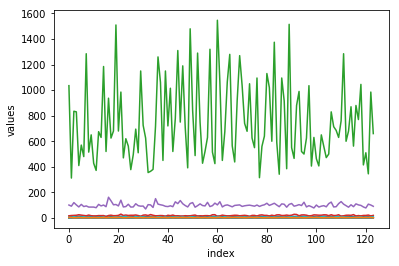

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_train)
plt.xlabel('index')
plt.ylabel('values')
plt.show()

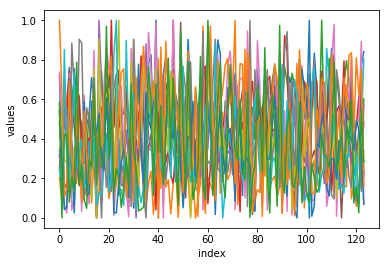

In [42]:
plt.plot(X_train_norm)
plt.xlabel('index')
plt.ylabel('values')
plt.show()

## Standardization
\begin{equation}
x_{std}^{(i)}=\frac{x^{i}-\mu_x}{\sigma_x}
\end{equation}

In [43]:
# Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

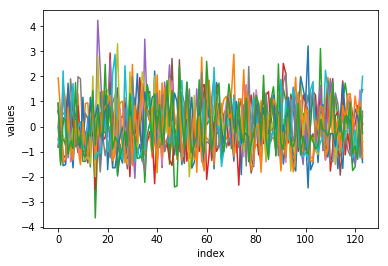

In [44]:
plt.plot(X_train_std)
plt.xlabel('index')
plt.ylabel('values')
plt.show()

Another visual example

In [45]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

#standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


In [46]:
# scikit-learn example
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])
ex_data = ex.values
mms = MinMaxScaler()
ex_data_norm = mms.fit_transform(ex_data)

stdsc = StandardScaler()
ex_data_std = stdsc.fit_transform(ex_data)

C:\Users\hyunjun\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\hyunjun\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [47]:
ex_data_std

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

In [48]:
ex_data_norm

array([[ 0. ],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.8],
       [ 1. ]])

In [49]:
temp = np.hstack((ex_data_std, ex_data_norm))

In [50]:
a = pd.DataFrame(temp)

In [51]:
a.columns = ['standardization', 'normalization']
a

,standardization,normalization
0,-1.46385,0.0
1,-0.87831,0.2
2,-0.29277,0.4
3,0.29277,0.6
4,0.87831,0.8
5,1.46385,1.0


# Data Preprocessing(Scaling) 전/후의 성능(Logistic Regression) 비교

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1) # Regularizer 있는 경우
# lr = LogisticRegression()                  # Regularizer 없는 경우

In [53]:
# Data pre-processing(Scaling) 전의 성능
lr.fit(X_train, y_train)
print('Training accuracy: ', lr.score(X_train, y_train))
print('Test accuracy: ', lr.score(X_test, y_test))

('Training accuracy: ', 0.95161290322580649)
('Test accuracy: ', 0.92592592592592593)


In [54]:
# Data pre-processing(Scaling) 후의 성능
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

('Training accuracy: ', 0.9838709677419355)
('Test accuracy: ', 0.98148148148148151)


In [55]:
# bias
lr.intercept_

array([-0.38378933, -0.15806537, -0.70043869])

In [56]:
# weigts
lr.coef_

array([[ 0.28025924,  0.        ,  0.        , -0.02811406,  0.        ,
         0.        ,  0.71000746,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23626566],
       [-0.6440308 , -0.06874822, -0.05719838,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92675496,
         0.06026737,  0.        , -0.37113674],
       [ 0.        ,  0.06154697,  0.        ,  0.        ,  0.        ,
         0.        , -0.63563077,  0.        ,  0.        ,  0.49785671,
        -0.35826302, -0.57172134,  0.        ]])

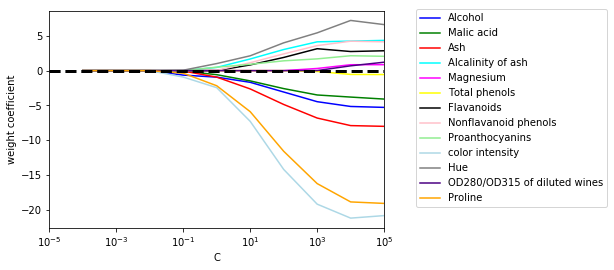

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

# 의미 있는 feature 선택하기

# Sparse solutions with L1-regularization (ppt)

## Sequential feature selection algorithm

feature를 제거 할것인지 말것인지를 결정하기 위해 최소화하고자 하는 objective function J를 정의 해야 한다. objective function에 의한 평가는 특정 feature가 제거되기 전과 후에 대한 classifier의 성능 차이로 계산할 수 있다.

In [58]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Sequential Backward Selection
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
              train_test_split(X, y, test_size = self.test_size, 
                               random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
                
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        return self
                
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

combinations는 tupe p에서 r개의 조합을 뽑아 내는 것

In [59]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x000000000DF380C8>

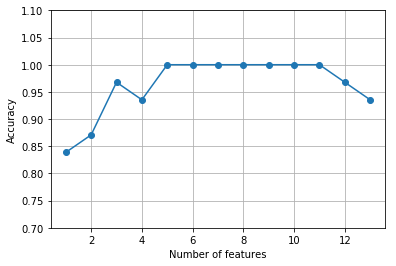

In [60]:
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [61]:
k6 = list(sbs.subsets_[7]) # feature 개수가 6개인 경우
print(df_wine.columns[1:][k6])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Flavanoids', u'Hue',
       u'Proline'],
      dtype='object')


In [62]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

('Training accuracy: ', 0.9838709677419355)
('Test accuracy: ', 0.94444444444444442)


In [63]:
knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k6], y_test))

('Training accuracy: ', 0.97580645161290325)
('Test accuracy: ', 0.98148148148148151)
